In [1]:
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd9e260556ce4e6a851308c22765517cc'

### 1. Create the fred object

In [3]:
fred = Fred(api_key=fred_key)

### 2. Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-03-12   2024-03-12   
CSUSHPINSA          CSUSHPINSA     2024-03-12   2024-03-12   
SP500                    SP500     2024-03-12   2024-03-12   
MEHOINUSA672N    MEHOINUSA672N     2024-03-12   2024-03-12   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-03-12   2024-03-12   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-03-11  Daily, Close   
CSUSHPINSA            1987-01-01      2023-12-01       Monthly   
SP500                 2014-03-12      2024-03-11  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-03-11  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-03-12 08:37:03-05:00   
CSUSHPINSA                           NSA  2024-02-27 08:14:02-06:00   
SP500                                NSA  2024-03-11 19:13:14-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-03-12 08:37:07-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

### 3. Pall row data & plot

<Axes: title={'center': 'S&P 500'}>

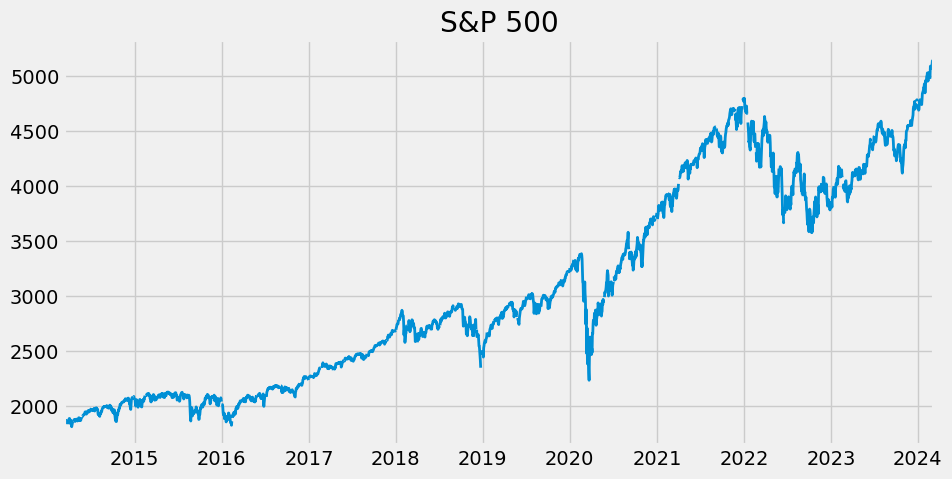

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

### 4. Pull and join multiple data series

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [8]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(series_id = myid)
    results= results.to_frame(name=myid)
    all_results.append(results)

In [9]:
all_titles = []
for myid in unemp_df.index:
    if len(myid) > 7:
        all_titles.append(myid)
unemp_result = pd.concat(all_results, axis=1).drop(all_titles, axis=1)
unemp_result = unemp_result.drop(['U2RATE', 'CMWRUR','CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'PRUR'], axis=1)

In [10]:
unemp_states = unemp_result.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [11]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2023-09-01         5.0    3.9       4.4      3.0           3.3   3.6   
2023-10-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-11-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-12-01         5.1    3.9       4.6      3.1           3.4   3.6   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2023-09-01       4.1      2.7            3.3             3.6       4.7   
2023-10-01       4.2      2.8            3.4             3.6       4.8   
2023-11-01       4.1      2.8            3.3             3.6       4.7   
2023-12-01       4.1      2.8            3.2             3.6       4.7   
2024-01-01       4.0      2.9            3.0             3.5       4.7   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2023-09-01         4.8      3.2       3.3      4.2        3.4       2.9   
2023-10-01         4.8      3.2       3.3      4.2        3.4       3.0   
2023-11-01         4.8      3.2       3.3      4.2        3.4       3.1   
2023-12-01         4.8      3.2       3.3      4.2        3.4       3.0   
2024-01-01         4.8      3.1       3.4      4.2        3.2       3.0   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2023-09-01       4.3             3.0         3.9        2.8        3.4   
2023-10-01       4.3             3.0         4.0        2.8        3.5   
2023-11-01       4.3             3.0         4.0        2.7        3.5   
2023-12-01       4.3             3.0         4.0        2.7        3.4   
2024-01-01       4.3             3.0         4.0        2.7        3.5   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

In [12]:
# plot States Unemployment Rate
px.line(unemp_states)

### Pull April 2020 Unemployment Rate Per State

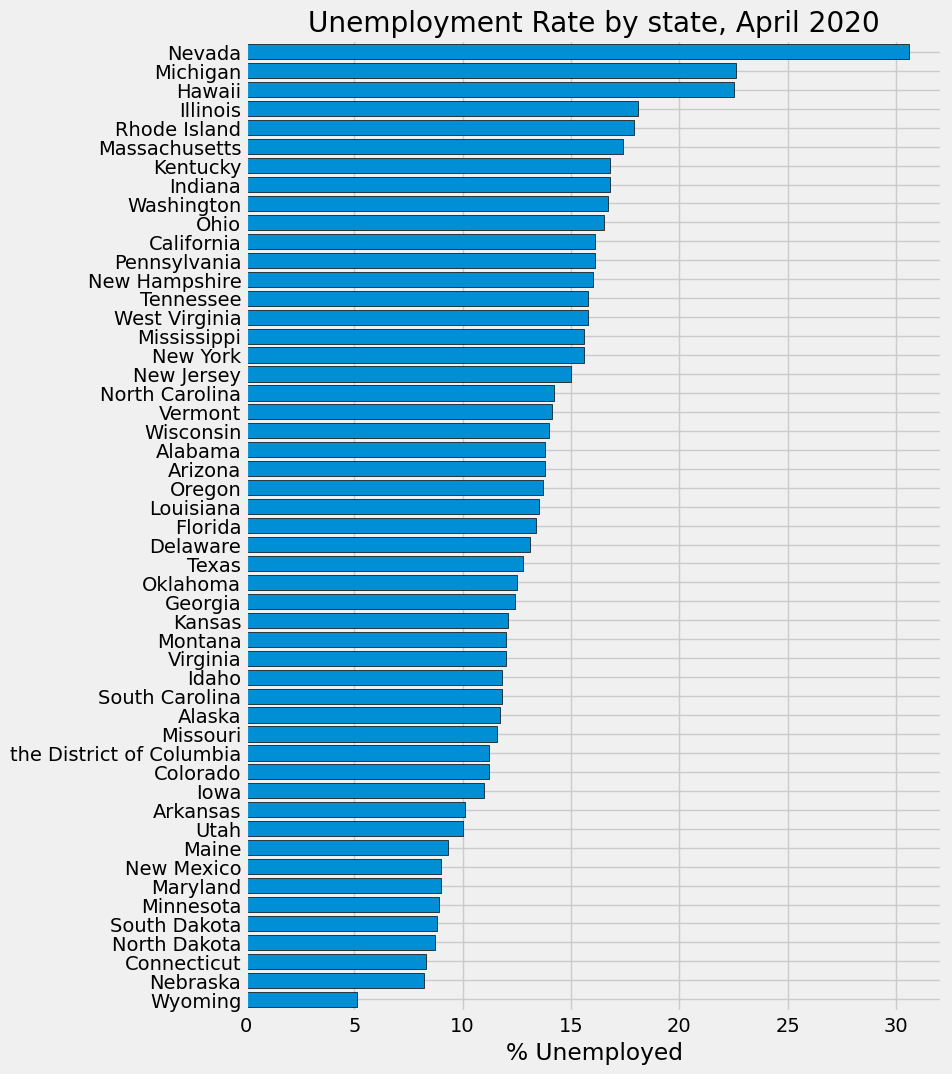

In [13]:
#.T => The 'T' to flip the data set. the back slash '\' to split the code a new row
ax = unemp_states.loc[unemp_states.index == "2020-04-01"].T \
    .sort_values("2020-04-01", ascending=True) \
    .plot(kind="barh", figsize=(8, 12), width=0.8, edgecolor='black', 
          title='Unemployment Rate by state, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

### Pull Participation Rate

In [14]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [15]:
# delete unwanted rows from the dataframe, and kept the states only
unwanted_rows = []
for myid in part_df['id']:
    if len(myid) > 8:
        unwanted_rows.append(myid)
part_result = part_df.drop(unwanted_rows)
part_result = part_result.drop('CIVPART')
part_result

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-03-12   2024-03-12   
LBSSA01    LBSSA01     2024-03-12   2024-03-12   
LBSSA36    LBSSA36     2024-03-12   2024-03-12   
LBSSA26    LBSSA26     2024-03-12   2024-03-12   
LBSSA28    LBSSA28     2024-03-12   2024-03-12   
LBSSA48    LBSSA48     2024-03-12   2024-03-12   
LBSSA12    LBSSA12     2024-03-12   2024-03-12   
LBSSA21    LBSSA21     2024-03-12   2024-03-12   
LBSSA39    LBSSA39     2024-03-12   2024-03-12   
LBSSA55    LBSSA55     2024-03-12   2024-03-12   
LBSSA42    LBSSA42     2024-03-12   2024-03-12   
LBSSA25    LBSSA25     2024-03-12   2024-03-12   
LBSSA27    LBSSA27     2024-03-12   2024-03-12   
LBSSA24    LBSSA24     2024-03-12   2024-03-12   
LBSSA54    LBSSA54     2024-03-12   2024-03-12   
LBSSA47    LBSSA47     2024-03-12   2024-03-12   
LBSSA23    LBSSA23     2024-03-12   2024-03-12   
LBSSA17    LBSSA17     2024-03-12   2024-03-12   
LBSSA37    LBSSA37     2024-03-12   2024-03-12   
LBSSA13    LBSSA13     2024-03-12   2024-03-12   
LBSSA22    LBSSA22     2024-03-12   2024-03-12   
LBSSA45    LBSSA45     2024-03-12   2024-03-12   
LBSSA08    LBSSA08     2024-03-12   2024-03-12   
LBSSA49    LBSSA49     2024-03-12   2024-03-12   
LBSSA51    LBSSA51     2024-03-12   2024-03-12   
LBSSA18    LBSSA18     2024-03-12   2024-03-12   
LBSSA29    LBSSA29     2024-03-12   2024-03-12   
LBSSA34    LBSSA34     2024-03-12   2024-03-12   
LBSSA19    LBSSA19     2024-03-12   2024-03-12   
LBSSA02    LBSSA02     2024-03-12   2024-03-12   
LBSSA53    LBSSA53     2024-03-12   2024-03-12   
LBSSA04    LBSSA04     2024-03-12   2024-03-12   
LBSSA35    LBSSA35     2024-03-12   2024-03-12   
LBSSA16    LBSSA16     2024-03-12   2024-03-12   
LBSSA05    LBSSA05     2024-03-12   2024-03-12   
LBSSA40    LBSSA40     2024-03-12   2024-03-12   
LBSSA31    LBSSA31     2024-03-12   2024-03-12   
LBSSA15    LBSSA15     2024-03-12   2024-03-12   
LBSSA32    LBSSA32     2024-03-12   2024-03-12   
LBSSA30    LBSSA30     2024-03-12   2024-03-12   
LBSSA41    LBSSA41     2024-03-12   2024-03-12   
LBSSA33    LBSSA33     2024-03-12   2024-03-12   
LBSSA50    LBSSA50     2024-03-12   2024-03-12   
LBSSA09    LBSSA09     2024-03-12   2024-03-12   
LBSSA38    LBSSA38     2024-03-12   2024-03-12   
LBSSA46    LBSSA46     2024-03-12   2024-03-12   
LBSSA20    LBSSA20     2024-03-12   2024-03-12   
LBSSA44    LBSSA44     2024-03-12   2024-03-12   
LBSSA11    LBSSA11     2024-03-12   2024-03-12   
LBSSA10    LBSSA10     2024-03-12   2024-03-12   
LBSSA56    LBSSA56     2024-03-12   2024-03-12   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [16]:
part_id_to_state =  part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []

for myid in part_result.index:
    results = fred.get_series(series_id = myid)
    results= results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

### Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

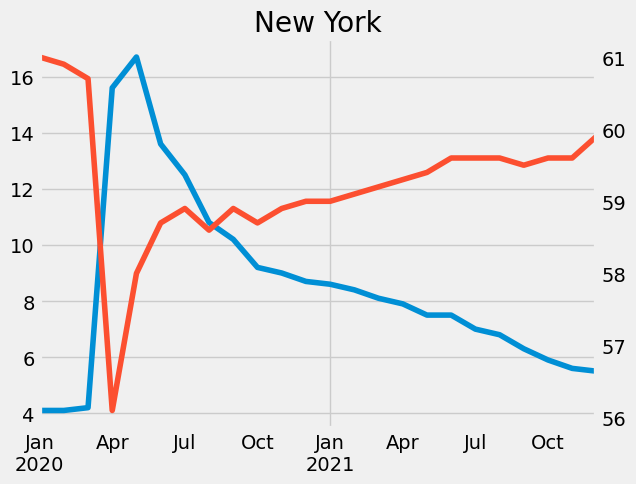

In [17]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=ax , label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

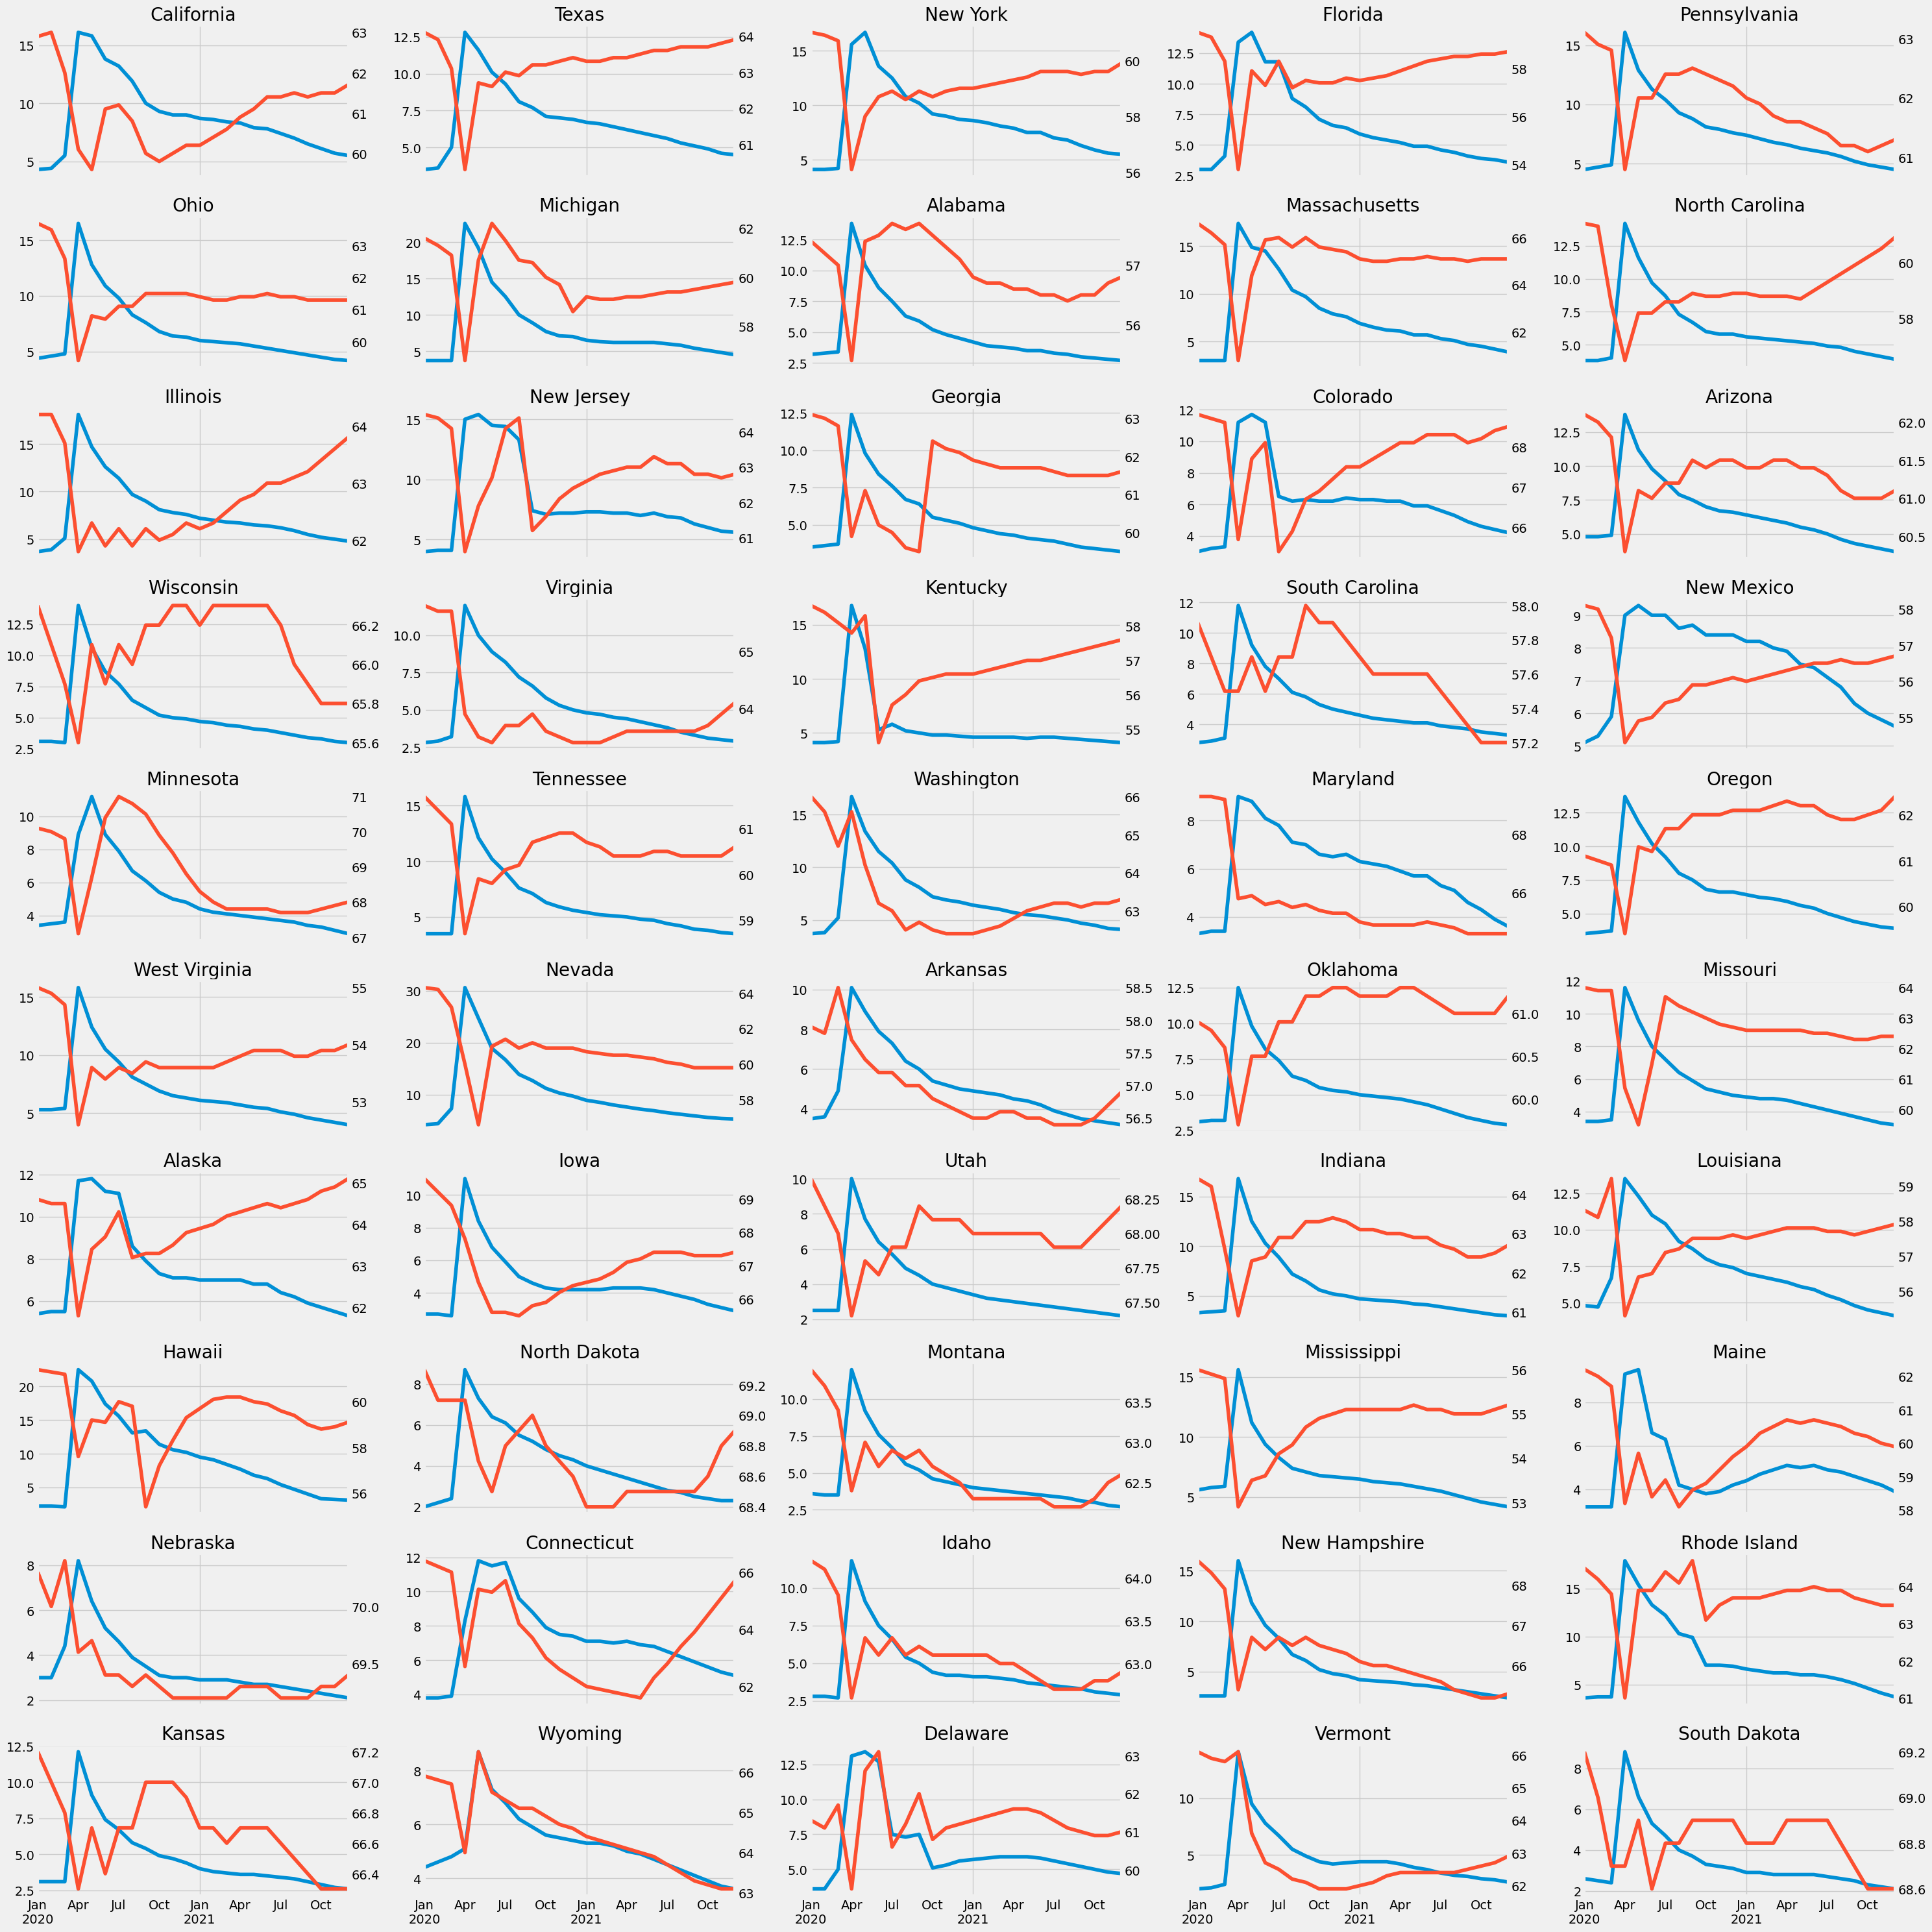

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == "the District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i] , label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()